## Task 1

Please use file *recruitment_task.csv*.

The company is considering collaborating with 10 gummy-bloggers (influencers) to promote its new product <b>P2</b>.

The attached file presents the results of a survey in which 1 000 respondents answered if they had seen an advertisement for another product <b>P</b> of the company on the social media of the 10 analyzed gummies (each respondent was able to see the advertisement for product <b>P1</b> on social media from 0, 1, 2 up to 10 influencers). Unfortunately, the current budget does not allow to advertise product <b>P</b> with all 10 bloggers, but only with 5.

Based on the survey, we want to analyze the individual (each influencer separately) and group (in specific subgroups of 2, 3... influencers) reach *of bloggers* among respondents (reach understood as seeing an advertisement).
***Media reach is an indicator showing the percentage of people who had contact with the selected advertisement in a given period of time. The campaign's goal is to maximize such reach - we want to achieve the largest number of respondents seeing advertisement with at least 1 influencer (blogger). If the campaign's reach is for example 90% it means that 90% (900 out of 1,000) respondents saw the advertisement for the given product at least once on the social media of the analyzed influencers.***

Please present the results of the conducted analysis along with visualizations and business recommendations.

*Sample plan - you may, but do not have to use it*
* What can we learn from the data (exploration)?
* Does the data set contain missing values / outliers / incorrect encoding?
* What is the reach of the selected gummy-blogger?
* What is the total reach of the selected subset of bloggers (e.g., gummies *i1*, *i2*, *i3*)?
* Which 5 selected influencers should the company choose to promote the <b>P2</b> product to maximize the reach of its campaign? What would be the recommendation in the case of 3 influencers, among whom influencer *i* must definitely be included?

## 📦 Used Python Packages

- pandas (for data manipulation)
- matplotlib (for data visualization)
- itertools (for combinations)

## Uploading data

In [12]:
import pandas as pd
df = pd.read_csv('recruitment_task.csv', sep=';')

# drop the index column
df = df.drop(columns = ['Unnamed: 0'])
df.head(20)

,Zummi,Gruffi,Grammi,Tummi,Sunni,Cubbi,Sir Thornberry,Gusto,Chummi,Sir Gallant
0,No,No,No,Yes,Yes,No,Yes,No,Yes,Yes
1,No,No,No,No,Yes,Yes,Yes,No,Yes,No
2,Yes,No,Yes,No,No,No,No,No,No,No
3,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
4,No,No,Yes,No,No,Yes,No,Yes,No,No
5,No,No,Yes,No,Yes,No,Yes,No,No,Yes
6,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No
7,No,Yes,No,No,Yes,No,No,No,Yes,Yes
8,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No
9,Yes,No,No,Yes,No,No,Yes,No,No,Yes


## Cleaning, normalization

### Missing values

In [13]:
df.isna().sum()

Zummi              9
Gruffi             9
Grammi            12
Tummi             13
Sunni             15
Cubbi             15
Sir Thornberry    11
Gusto             17
Chummi            11
Sir Gallant       15
dtype: int64

In [14]:
df = df.fillna(0) # fill missing values
print("\nAfter filling missing values:")
print(df.isna().sum())


After filling missing values:
Zummi             0
Gruffi            0
Grammi            0
Tummi             0
Sunni             0
Cubbi             0
Sir Thornberry    0
Gusto             0
Chummi            0
Sir Gallant       0
dtype: int64


### Normalization

In [15]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Zummi: ['No' 'Yes' 'Seen' 'Saw' "Haven't" 'Not seen' 'Ye s' 0]
Gruffi: ['No' 'Yes' 'Ye s' "Haven't" 'Not seen' 'Saw' 'Seen' 0]
Grammi: ['No' 'Yes' "Haven't" 'Ye s' 'Saw' 'Not seen' 'Seen' 0]
Tummi: ['Yes' 'No' 'Saw' 'Seen' 'Not seen' 'Ye s' 0 "Haven't"]
Sunni: ['Yes' 'No' 'Not seen' 0 'Saw' 'Seen' 'Ye s' "Haven't"]
Cubbi: ['No' 'Yes' 'Not seen' "Haven't" 'Ye s' 'Saw' 'Seen' 0]
Sir Thornberry: ['Yes' 'No' 'Seen' 'Not seen' 'Saw' "Haven't" 0 'Ye s']
Gusto: ['No' 'Yes' 'Seen' 'Ye s' 'Not seen' 0 "Haven't" 'Saw']
Chummi: ['Yes' 'No' 'Seen' "Haven't" 0 'Not seen' 'Saw' 'Ye s']
Sir Gallant: ['Yes' 'No' 'Ye s' "Haven't" 'Saw' 'Not seen' 'Seen' 0]


We can see here that the data is not normalized, therefore we need to convert it to a more convinient binary type.

In [16]:
def normalize(val):
    if isinstance(val, str):
        val = val.lower().strip() # set lowercase and delete whitespaces
        if 'yes' in val or 'seen' in val or 'saw' in val:
           return 1
        elif 'no' in val or 'haven' in val or 'not' in val:
           return 0
    return 0
df = df.applymap(normalize) # apply for the whole set
df.head(20)

/var/folders/dz/6fw_l0492zj06q8sznbx4l5c0000gn/T/ipykernel_59865/70727335.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(normalize) # apply for the whole set


,Zummi,Gruffi,Grammi,Tummi,Sunni,Cubbi,Sir Thornberry,Gusto,Chummi,Sir Gallant
0,0,0,0,1,1,0,1,0,1,1
1,0,0,0,0,1,1,1,0,1,0
2,1,0,1,0,0,0,0,0,0,0
3,0,1,1,1,1,0,1,1,1,0
4,0,0,1,0,0,1,0,1,0,0
5,0,0,1,0,1,0,1,0,0,1
6,0,1,1,0,0,1,1,1,0,0
7,0,1,0,0,1,0,0,0,1,1
8,0,0,0,1,1,1,1,0,1,0
9,1,0,0,1,0,0,1,0,0,1


## 📈 Analysis (individual and group coverage)

### Individual Blogger Reach

In [17]:
df.mean().sort_values(ascending=False)

Sunni             0.493
Zummi             0.486
Chummi            0.480
Sir Gallant       0.479
Sir Thornberry    0.476
Cubbi             0.475
Gruffi            0.468
Gusto             0.462
Grammi            0.446
Tummi             0.438
dtype: float64

### Top-5 Group Reach Combos (5 bloggers)

In [18]:
from itertools import combinations
bloggers = df.columns.tolist()
results1 = []
for combo in combinations(bloggers, 5):
    reach = df[list(combo)].any(axis=1).mean() # .any calculates how many unique people have seen the ad by all of the selected bloggers
    results1.append((combo, reach))
sorted(results1, key=lambda x: x[1], reverse=True)[:5] # top 5

[(('Zummi', 'Gruffi', 'Sunni', 'Cubbi', 'Chummi'), np.float64(0.971)),
 (('Zummi', 'Gruffi', 'Cubbi', 'Chummi', 'Sir Gallant'), np.float64(0.97)),
 (('Zummi', 'Grammi', 'Cubbi', 'Gusto', 'Sir Gallant'), np.float64(0.97)),
 (('Zummi', 'Gruffi', 'Cubbi', 'Sir Thornberry', 'Chummi'), np.float64(0.969)),
 (('Zummi', 'Grammi', 'Sunni', 'Cubbi', 'Sir Gallant'), np.float64(0.969))]

Looks like Zummi is the most popular and "exclusive" in their audience as they provide unique reach so I'd suggest "fixing" them.

### Top-5 Group Reach Combos (3 bloggers)

In [19]:
fixed = 'Zummi'
others = [blogger for blogger in df.columns if blogger != fixed] 

from itertools import combinations
results2 = []
for combo in combinations(bloggers, 2): # 2 because Zummi is already fixed
    full_combo = [fixed] + list(combo) # add Zummi
    reach = df[list(full_combo)].any(axis=1).mean() 
    results2.append((full_combo, reach))
sorted(results2, key=lambda x: x[1], reverse=True)[:5]

[(['Zummi', 'Cubbi', 'Chummi'], np.float64(0.873)),
 (['Zummi', 'Cubbi', 'Sir Gallant'], np.float64(0.87)),
 (['Zummi', 'Grammi', 'Cubbi'], np.float64(0.869)),
 (['Zummi', 'Gruffi', 'Cubbi'], np.float64(0.868)),
 (['Zummi', 'Cubbi', 'Gusto'], np.float64(0.868))]

## 📊 Visualizations

### Individual Blogger Reach

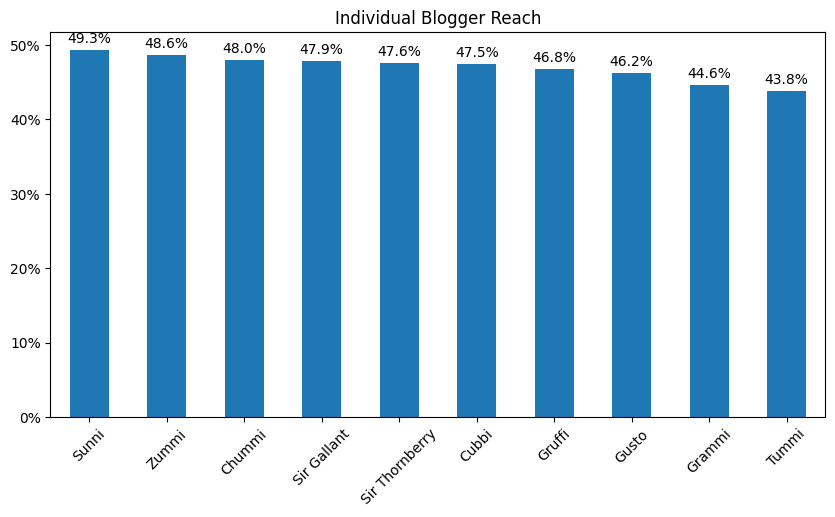

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

ind_reach = df.mean().sort_values(ascending=False) 
graph1 = ind_reach.plot(kind='bar', figsize=(10,5))

plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1)) # replace decimals with percents

plt.title('Individual Blogger Reach')
plt.xticks(rotation=45)

for i, val in enumerate(ind_reach):
    graph1.text(i, val + 0.01, f'{val:.1%}', ha='center') # add precise values

plt.show()

### Reach of Blogger Groups (5)

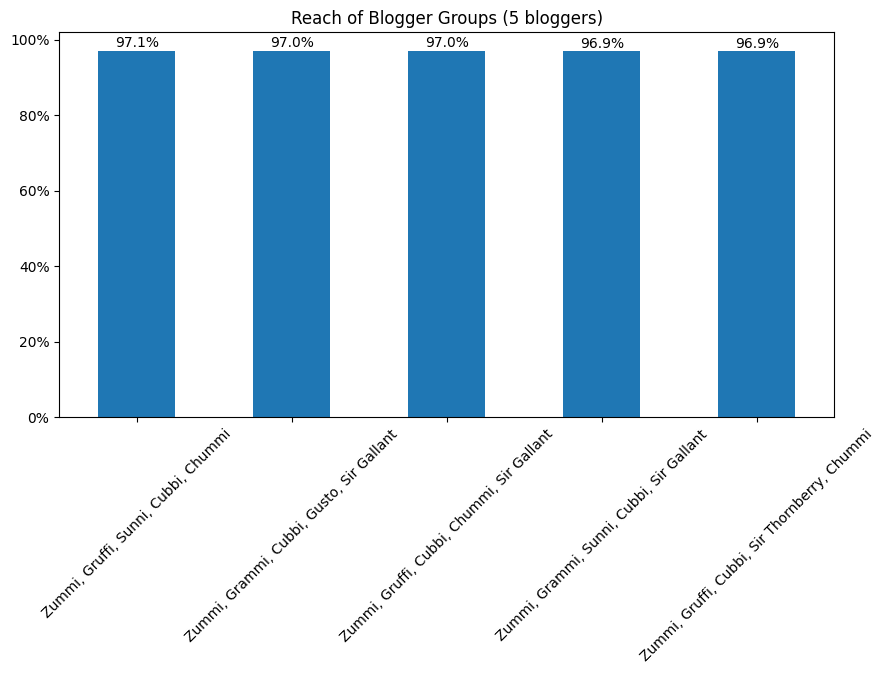

In [21]:
df_results1 = pd.DataFrame(results1, columns=['Combo', 'Reach']) # convert results1 into a df
df_results1 = df_results1.sort_values(by='Reach', ascending=False) # sort in decs
df_results1['Combo_str'] = df_results1['Combo'].apply(lambda x: ', '.join(x)) # convert tuple of bloggers into a string for labeling
top5 = df_results1.head(5)

graph2 = top5.plot(kind='bar', x='Combo_str', y='Reach', figsize=(10,5), legend=False)

plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1)) # replace decimals with percents again

plt.title('Reach of Blogger Groups (5 bloggers)')
plt.xlabel('')
plt.xticks(rotation=45)

for i, val in enumerate(top5['Reach']):
    graph2.text(i, val + 0.01, f'{val:.1%}', ha='center') # add precise values again

plt.show()

### Reach of Blogger Groups (3)

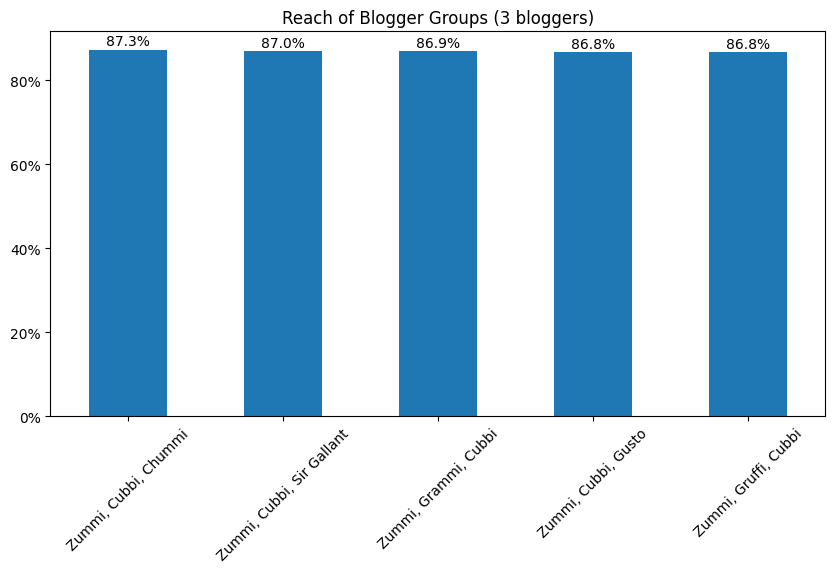

In [22]:
df_results2 = pd.DataFrame(results2, columns=['Combo', 'Reach'])
df_results2 = df_results2.sort_values(by='Reach', ascending=False)
df_results2['Combo_str'] = df_results2['Combo'].apply(lambda x: ', '.join(x)) 
another_top5 = df_results2.head(5)

graph3 = another_top5.plot(kind='bar', x='Combo_str', y='Reach', figsize=(10,5), legend=False)

plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))

plt.title('Reach of Blogger Groups (3 bloggers)')
plt.xlabel('')
plt.xticks(rotation=45)

for i, val in enumerate(another_top5['Reach']):
    graph3.text(i, val + 0.01, f'{val:.1%}', ha='center')

plt.show()

In [23]:
# FINAL TABLE
df_results1.rename(columns={'Combo_str': 'Blogger Group'}, inplace=True)

# The Five
top5_group = df_results1.sort_values(by='Reach', ascending=False).head(1)
top5_names = list(top5_group['Combo'].iloc[0])  # convert the tuple to a list

# The Three
top3_group = df_results2.sort_values(by='Reach', ascending=False).head(1)
top3_names = list(top3_group['Combo'].iloc[0])

# Individual reach
ind_reach = df.mean()

# creating the final table
ind_part = pd.DataFrame({
    'Blogger': top5_names,
    'Reach': [f'{ind_reach[blogger]:.1%}' for blogger in top5_names]
})

top_3 = pd.DataFrame({
    'Blogger': ['Group 3: Zummi, Cubbi, Chummi'],
    'Reach': [f'{top3_group["Reach"].iloc[0]:.1%}']
})

top_5 = pd.DataFrame({
    'Blogger':['Group 5: Zummi, Cubbi, Chummi, Gruffi, Sunni'],
    'Reach': [f'{top5_group["Reach"].iloc[0]:.1%}']
})

final_table = pd.concat([ind_part, top_3, top_5], ignore_index=True)
final_table

,Blogger,Reach
0,Zummi,48.6%
1,Gruffi,46.8%
2,Sunni,49.3%
3,Cubbi,47.5%
4,Chummi,48.0%
5,"Group 3: Zummi, Cubbi, Chummi",87.3%
6,"Group 5: Zummi, Cubbi, Chummi, Gruffi, Sunni",97.1%


## 💡 Results and Recommendations

As we can see above, the best 5 blogger group consists from Zummi, Cubbi, Chummi, Gruffi and Sunni with the total reach of 97.1%  
If the budget limits the selection to only 3 bloggers, my recommendation would be Zummi, Cubbi and Chummi, whose predicted total reach would be 87.3%  
And as I marked earlier, Zummi is the key influencer here as they attract the most unique audience and will complement any combination advantageously.

I realized, that the best way to promote something isn't just focusing on big numbers, but finding the right combination.